In [ ]:
#import pymc
import numpy as np
import matplotlib
import scipy as sp
%matplotlib inline
import math
import seaborn as sns
import scipy.stats as sps
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style('white')
sns.set_context('talk')
np.random.seed(123)

# What is a t-Test?

In essence, a t test compares two averages (means) and tells you if they are different from each other. 

# Why is it useful?

Say that we have the following datasets.

In [140]:
data1 = pd.read_csv('data1.csv', index_col=0)
data1.head(2)

,point
0,-1.670157
1,0.634933


In [141]:
data2 = pd.read_csv('data2.csv', index_col=0)
data2.head(2)

,point
0,26.706402
1,19.645389


We would like to be able say if these two datasets correspond to the same distribution.

Problem: You are a new technician in a repair company. The guy who had the job before you left and didn't tell anyone. You found these two datasets but are not sure what they are from. You are curious if they are even related. Maybe they are both observations made on the same machine on different days. If only you knew of a way to know if these datasets correspond to different sensors...

All of the sudden you remember that in your Statistics class you learned about a t-Test!

After you googled the formula for the tTest you find that you need a few things:

m1 = Mean of first set of values

m2 = Mean of second set of values

S1 = Standard deviation of first set of values

S2 = Standard deviation of second set of values

n1 = Total number of values in first set

n2 = Total number of values in second set.

In [142]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
point,1000.0,19.593206,12.033193,-25.567622,11.502837,19.95921,27.946108,60.893027


In [143]:
m1 = data1.describe().T.loc['point']['mean']
S1 = data1.describe().T.loc['point']['std']
n1 = data1.describe().T.loc['point']['count']

In [144]:
m1, S1, n1

(19.593205685374546, 12.033192943724034, 1000.0)

In [145]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
point,1000.0,20.615436,10.811155,-15.775726,13.27142,20.915049,27.872173,59.437148


In [146]:
m2 = data2.describe().T.loc['point']['mean']
S2 = data2.describe().T.loc['point']['std']
n2 = data2.describe().T.loc['point']['count']

In [147]:
m2, S2, n2

(20.615435792497053, 10.811154717670025, 1000.0)

In [148]:
t = (m1-m2)/math.sqrt((S1**2/n1)+(S2**2/n2))

In [149]:
t

-1.9983170739862877

You can use a t table to find the pvalue and determined whether or not they are independent or you can use build-in functions from scipy.

In [150]:
# Turn datasets into arrays
data1 = np.array(data1['point'])
data2 = np.array(data2['point'])

In [125]:
data2 = np.array(data2['point'])

In [151]:
sps.ttest_ind(data1, data2, equal_var = False)

Ttest_indResult(statistic=-1.9983170739863503, pvalue=0.045819139211546775)

In [152]:
1-sps.ttest_ind(data1, data2, equal_var = False)[1]

0.95418086078845321

We are 0.95418086078845321 sure that these two datasets must correspond to different sensors.

Lets look at the two sample distribution together.

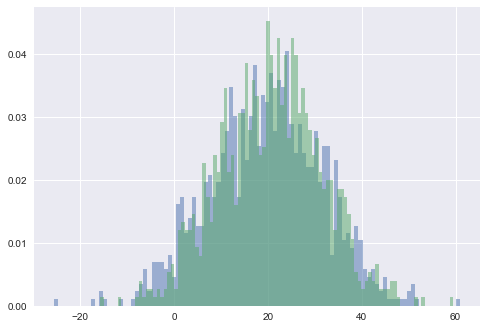

In [153]:
plt.hist(data1, bins=100, normed=True, alpha = 0.5)
plt.hist(data2, bins=100, normed=True, alpha = 0.5)

# Show all plots.
plt.show()

We saw that the 0.95418086078845321 corresponded to the pvalue but we have not discussed that.

# What's a p-value?

When designing an experiment we usually have a hypothesis in mind.

Example hypothesis:

a) The average height of men in the United States is 5 feet 9 inches.

b) My graduating class's average on the SAT was higher than the national average.

These are the things we believe to be true.

We need to investigate a bit further and decide whether we are right (or rather not wrong) or wrong.

These are what we call our alternative hypothesis or **H_A**

We call the negation of **H_A** the Null Hypothesis or **H_0**

The Null hypothesis of the previous cases is then:

a) The average height of men in the United States is not 5 feet 9 inches.

b) My graduating class's average on the SAT was lower than or equal to the national average.

### The p-value is then the probability of finding the observed results when the null hypothesis of a study question is true.

In our case of the tTest, 

H_A = the measurements come from two different sensors.

H_0 = the measurements come from the same sensor.

Since our pvalue was 0.045819139211546775 it made it very unlikely for H_0 to be true, so we rejected the null hypothesis.

_Noticed that I said unlikely and not impossible._

**Type I error** (or false positive) = Saying something is true when it actually is false. (False rejection of the Null Hypothesis.)

**Type II error** (or false negative) = Saying something is false when it actually is true. (False acceptance of the Null Hypothesis.)

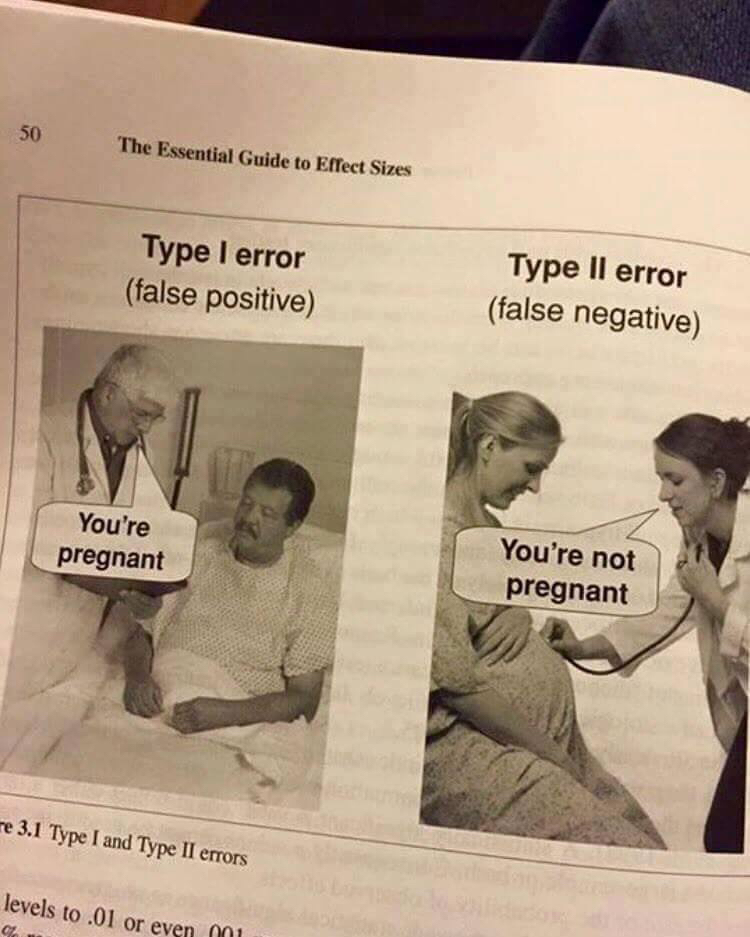

Precision = What percentage of the cases where it was actually true did we get right?

Recall = What percentage of the cases we said were true were actually true?

We can formulate these terms.

Precision = (True Positives)/(True Positives + Type I Error) = (True Positives)/(True Positives + False Positives)

Recall = (True Positives)/(True Positives + Type II Error) = (True Positives)/(True Positives + False Negatives)

# Bayes' Rule

## A new patient walks in an admits to you that he is an alcoholic and is concern about getting a liver disease.

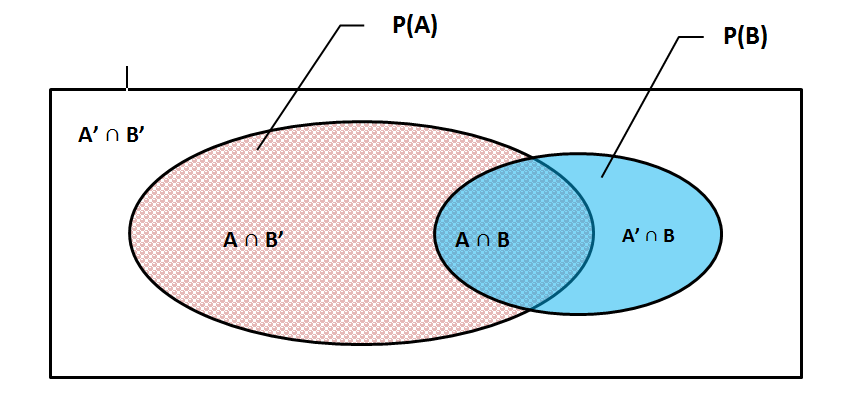

In [155]:
.007/.05

0.13999999999999999

### We find that P(A|B) = 14%

# Posterior Samples

## Example: Lets estimate the posterior of the mean and we'll assume that we know the standard deviation to be 1.

In [169]:
# Lets generate some data! Lets say that our data is normal centered at 0 and asumme std is 1.
data = np.random.randn(30)

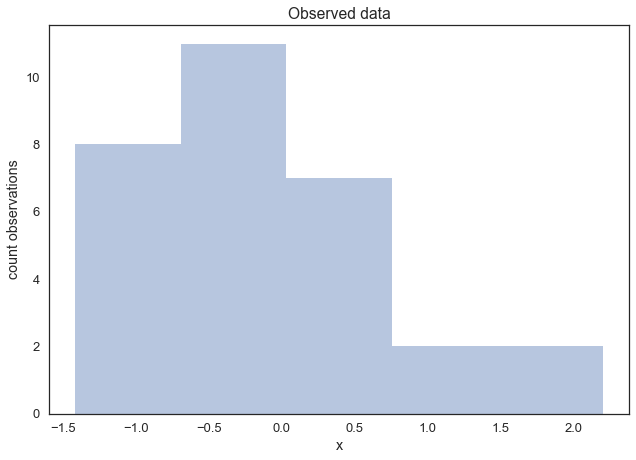

In [170]:
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Observed data', xlabel='x', ylabel='count observations');

Since we don't know our mean, lets call it _mu_.

We want to infer the posterior of _mu_ and so we must choose a prior for _mu_.

_mu_ ~ Normal(0,1)

Then our data can be which was normally distributed, with std 1 and mean _mu_ can be described as:

x|_mu_ ~ Normal(x; _mu_, 1)

Notice that in this example the normal prior for _mu_ follows the same distribution as the posterior, we call this **conjugate priors**.

In [175]:
# function that takes our data, and mean and sigma of our prior and returns the analytical posterior
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

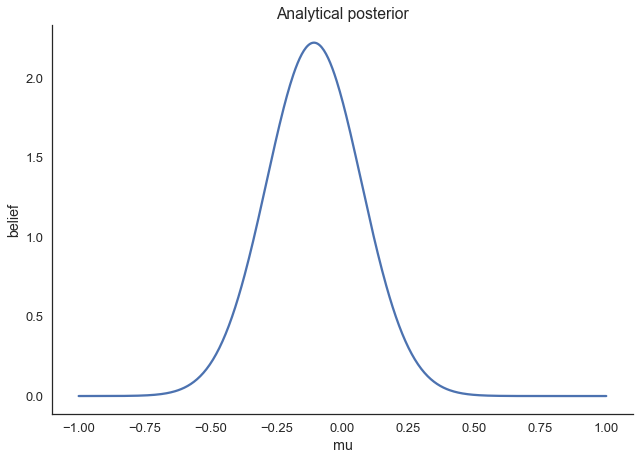

In [179]:
# Lets plot the results from the previous function.
ax = plt.subplot()
x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
ax.plot(x, posterior_analytical)
ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior');
sns.despine()

## This graph shows the probability of _mu_ after seeing our data!

## How does this compare to hypothesis testing?